# Setting up the environment

In [ ]:
!pip install gdown

In [ ]:
!mkdir -p data/
!gdown https://drive.google.com/uc?id=1zcsUU6neakc2_BnATvvsLekvMyz1cztM -O data/
!gdown https://drive.google.com/uc?id=1zZdavmX2Zlhfe9up-25rXvE3v0HF9Ajd -O data/

Downloading...
From: https://drive.google.com/uc?id=1zcsUU6neakc2_BnATvvsLekvMyz1cztM
To: /content/data/Advertising.csv
100% 4.55k/4.55k [00:00<00:00, 9.28MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zZdavmX2Zlhfe9up-25rXvE3v0HF9Ajd
To: /content/data/Portland_housePrices.csv
100% 679/679 [00:00<00:00, 2.05MB/s]


## Regression

The objective of this exercise is to introduce and practice Regression concepts. For this, we will use 2 datasets: <i>Advertising.csv</i> and <i>Portland_housePrices.csv</i>

In [ ]:
import pandas as pd

dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)
dados_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<i>Advertising</i> is a dataset relating the amount of sales (<i>sales</i>) with the amount invested in marketing across different media (<i>TV</i>, <i>radio</i> and <i>newspaper</i>).

In turn, <i>Portland_housePrices</i> relates house prices with their size and number of bedrooms.



In [ ]:
dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)
dados_por.head()

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## How to train and use models?
For virtually any type of Regression algorithm, there will be a <i>fit</i> function to train the model.

For example, for linear regression:

```python
 reg = LinearRegression().fit(X,y)
```

Where <i> X </i> refers to the training features and <i>y</i> to the target variable.


In [ ]:
from sklearn.linear_model import LinearRegression
#Train model using size data to predict price
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

reg = LinearRegression().fit(X,y)
reg

LinearRegression()

After training, the model can be used to make predictions (predict <i>y</i> for new examples), through the <i>predict</i> function

In [ ]:
y_hat = reg.predict(X[0:4])
y_hat

array([[354311.69781212],
       [286510.95280112],
       [394131.18297731],
       [261758.29986059]])

# Multivariate Linear Regression
The <i>LinearRegression</i> class is already implemented to work with multiple predictor attributes.

It is also possible to use the <i>Gradient Descent</i> method through the <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html'>SGDRegressor</a> class:
    


In [ ]:
from sklearn.linear_model import SGDRegressor
reg_grad = SGDRegressor(max_iter=5000,alpha=0) #alpha = 0 means the model does not use regularization (to be explained in upcoming classes)
reg_grad.fit(X,y.values.ravel())

SGDRegressor(alpha=0, max_iter=5000)

Text(0, 0.5, 'Price')

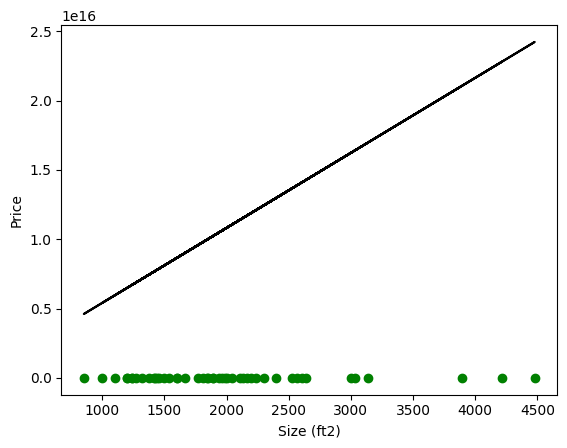

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X, y,color='g')
plt.plot(X, reg_grad.predict(X),color='k')
plt.xlabel('Size (ft2)')
plt.ylabel('Price')

<b>However</b>... the algorithm does not learn when the data is used directly.

<b>Why?</b>

The scale of the data hinders the algorithm. Try training the linear regressor with gradient descent <i>after normalizing the input data</i>.

## Exercise 1

For each of the training sets, use the <i>fit</i> function multiple times considering only <i>one</i> predictor attribute.

1) Does the learned model change each time the <i>fit</i> function is used?

2) Are the final learned models the same as those from the other linear regression implementation?


## Exercise 2


Learn models using all input attributes.

1) Based on RSS and R^2, is it possible to obtain a better model using all the data?

2) Are there attributes that could be disregarded without affecting accuracy?

3) Which implementation trains faster? The one with least squares method or the one with gradient descent?


# Exercise 3

Perform quality analysis of the predictors used in the constructed model.

1) Construct the residual plot. Are the residuals randomly distributed around 0?

2) Calculate the p-values for the predictors used in the regression model. Use [this link](https://stackoverflow.com/a/42677750) as reference. Use this technique to select predictive variables. Compare the performance of the model built from predictive variables with better p-values with a model that contains all variables.


# Exercise 4

Perform the test to discover multicollinearity between predictive variables;

1) Using [this link](https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/) calculate the *Variance Inflation Factor (VIF)*. Is there any evidence of multicollinearity between the predictive variables?